In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os
import statistics

## Reading Data

In [21]:
PATH = "../data/finals_frameworks"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [22]:
file_data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    file_data.append(data_in)
    
data_original = pd.concat(file_data)

## Cleanup Data

In [23]:
# remove absolute outliers
data = data_original.loc[~((data_original['framework'] == 'GDIplus') & (data_original['program'] == 'getpixel') & (data_original['diff'] > 7000) & (data_original['complexity'] == 'default'))] 
data = data_original.loc[~((data_original['framework'] == 'Skia') & (data_original['program'] == 'windup') & (data_original['diff'] < 0) & (data_original['complexity'] == 'default'))] 

In [24]:
# negative diff
negative_diffs_getpixel = data_original[(data_original['program'] == 'getpixel') & (data_original['diff'] < 0)]['id'].count()
negative_diffs_windup = data_original[(data_original['program'] == 'windup') & (data_original['diff'] < 0)]['id'].count()

# no result of measurement program
no_result_getpixel = data_original[(data_original['program'] == 'getpixel') & (data_original['fw'] == -1)]['id'].count()
no_result_windup = data_original[(data_original['program'] == 'windup') & (data_original['fw'] == -1)]['id'].count()

# exclude this from our data
data = data_original[(data_original['diff'] > 0) & (data_original['fw'] != -1)]

In [25]:
print(no_result_getpixel)

1400


In [26]:
diff_validation = pd.DataFrame(index=['GETPIXEL', 'DESKDUP', 'Total'], columns=['negative', 'no result', 'Total'])
diff_validation['negative']['GETPIXEL'] = negative_diffs_getpixel
diff_validation['no result']['GETPIXEL'] = no_result_getpixel
diff_validation['Total']['GETPIXEL'] = negative_diffs_getpixel + no_result_getpixel

diff_validation['negative']['DESKDUP'] = negative_diffs_windup
diff_validation['no result']['DESKDUP'] = no_result_windup
diff_validation['Total']['DESKDUP'] = negative_diffs_windup + no_result_windup

diff_validation['negative']['Total'] = negative_diffs_getpixel + negative_diffs_windup
diff_validation['no result']['Total'] = no_result_getpixel + no_result_windup
diff_validation['Total']['Total'] = negative_diffs_getpixel + no_result_getpixel + negative_diffs_windup + no_result_windup


print(diff_validation.to_latex(index=True,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))


diff_validation

\begin{tabular}{llll}
\toprule
 & negative & no result & Total \\
\midrule
GETPIXEL & 21 & 1400 & 1421 \\
DESKDUP & 551 & 4 & 555 \\
Total & 572 & 1404 & 1976 \\
\bottomrule
\end{tabular}



,negative,no result,Total
GETPIXEL,21,1400,1421
DESKDUP,551,4,555
Total,572,1404,1976


## z-Value Removal

In [27]:
# remove based on program validation (z-value removal)
#  {'program': 'getpixel', 'framework': 'GTK'},
#  {'program': 'getpixel', 'framework': 'pyglet'},
#  {'program': 'windup', 'framework': 'Java2D'},
#  {'program': 'windup', 'framework': 'JavaSwing'},
#  {'program': 'windup', 'framework': 'pygame'},
#  {'program': 'windup', 'framework': 'pyqt6_quick'},
#  {'program': 'windup', 'framework': 'SDL2_Direct3D'}
data = data.loc[~((data['framework'] == 'GTK') & (data['program'] == 'getpixel'))]
data = data.loc[~((data['framework'] == 'pyglet') & (data['program'] == 'getpixel'))]
data = data.loc[~((data['framework'] == 'Java2D') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'JavaSwing') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'pygame') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'pyqt6_quick') & (data['program'] == 'windup'))]
data = data.loc[~((data['framework'] == 'SDL2_Direct3D') & (data['program'] == 'windup'))]

In [28]:
# frameworks = data_original['framework'].unique()
# programs = data_original['program'].unique()

# valids = []
# for program in programs:
#     for framework in frameworks:
#         valid_temp = {}
#         valid_temp['program'] = program
#         valid_temp['framework'] = framework
#         valid_temp['mean'] = data[(data['framework'] == framework) & (data['program'] == program)]['diff'].mean()
#         valid_temp['std'] = data[(data['framework'] == framework) & (data['program'] == program)]['diff'].std()
#         valids.append(valid_temp)

# valid = pd.DataFrame.from_dict(valids)
# valid

In [29]:
# agg_means = {}
# stds = {}
# for program in programs:
#     agg_means[program] = valid[valid['program'] == program]['mean'].mean()
#     stds[program] = valid[valid['program'] == program]['mean'].std()

In [30]:
# combinations_to_remove = []

In [31]:
# # getpixel
# for framework in frameworks:
#     mean_exists = True
#     fw_mean_df_row = valid[(valid['program'] == 'getpixel') & (valid['framework'] == framework)]
#     fw_mean = fw_mean_df_row['mean'].item()
    
#     if math.isnan(fw_mean):
#         print(f'already excluded {framework} getpixel')
#         mean_exists = False

#     if mean_exists:
#         if (fw_mean > agg_means['getpixel'] + (0.5 * stds['getpixel'] * 3)) or (fw_mean < agg_means['getpixel'] - (0.5 * stds['getpixel'] * 3)):
#             print(f'exclude {framework} getpixel')
#             combinations_to_remove.append({'program' : 'getpixel', 'framework' : framework})
#         else:
#             print(f'valid for {framework} getpixel')

In [32]:
# # windup
# for framework in frameworks:
#     mean_exists = True
#     fw_mean_df_row = valid[(valid['program'] == 'windup') & (valid['framework'] == framework)]
#     fw_mean = fw_mean_df_row['mean'].item()
    
#     if math.isnan(fw_mean):
#         print(f'already excluded {framework} windup')
#         mean_exists = False

#     if mean_exists:
#         if (fw_mean > agg_means['windup'] + (0.5 * stds['windup'] * 3)) or (fw_mean < agg_means['windup'] - (0.5 * stds['windup'] * 3)):
#             print(f'exclude {framework} windup')
#             combinations_to_remove.append({'program' : 'windup', 'framework' : framework})
#         else:
#             print(f'valid for {framework} windup')

In [33]:
# # exclude from data based on z-value removal
# for combination in combinations_to_remove:
#     data = data.loc[~((data['program'] == combination['program']) & (data['framework'] == combination['framework']))] 

In [34]:
# combinations_to_remove

## EtE-Validation

In [35]:
# end-to-end latency validation
data_none = data_original[data_original['program'] == 'none']
data_getpixel = data[data['program'] == 'getpixel']
data_windup = data[data['program'] == 'windup']

median_ete_none = data_none['ete_upper'].median()
sd_ete_none = data_none['ete_upper'].std()
median_ete_getpixel = data_getpixel['ete_upper'].median()
sd_ete_getpixel = data_getpixel['ete_upper'].std()
median_ete_windup = data_windup['ete_upper'].median()
sd_ete_windup = data_windup['ete_upper'].std()

print(f'none --- median: {median_ete_none}, std: {sd_ete_none}')
print(f'getpixel --- median: {median_ete_getpixel}, std: {sd_ete_getpixel}')
print(f'windup --- median: {median_ete_windup}, std: {sd_ete_windup}')


none --- median: 11459.0, std: 30909.684383958825
getpixel --- median: 8195.0, std: 34724.779219664604
windup --- median: 9046.0, std: 30459.56404605892


## Plotting Results

In [36]:
COLOR_GLUTROT = '#DA3C43'
COLOR_HEIDENELKE = '#9C004B'

COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

COLOR_GREEN = '#7dff1a'
COLOR_DARKGREEN = '#4FB800'

COLOR_OCKER_ANDI = '#ebb300'
COLOR_OCKER = '#EC7F00'

COLOR_NONE = '#8E8E8D'

PALETTE_LIGHT = [COLOR_BLUE, COLOR_GREEN, COLOR_GLUTROT, COLOR_OCKER_ANDI]
PALETTE_DARK = [COLOR_DARKBLUE, COLOR_DARKGREEN, COLOR_HEIDENELKE, COLOR_OCKER]

FRAMEWORK_ORDER = ['WinUI', 'WinAPI', 'GDIplus', 'Direct3D', 'Direct2D', 'Blend2D', 'Cairo', 'FLTK', 'Java2D', 'JavaSwing','Qt5', 'Qt6', 'pyqt5', 'pyqt6', 'pyqt6_quick', 'tkinter', 'wxpython', 'wxpython_d2d', 'SDL2_Direct3D', 'SDL2_OpenGLES', 'SDL2_OpenGL', 'SDL2_Software', 'pygame', 'pyglet', 'GTK', 'GLUT', 'GLEW', 'SFML', 'Skia']

In [37]:
data['ete_upper'] = data['ete_upper'] / 1000
data['ete_lower'] = data['ete_lower'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000
data = data[data['program'] != 'none']
data

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.291,13.603,4.887,6.404
1,1,1,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,12.327,14.641,6.417,5.910
2,2,2,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.633,13.950,5.467,6.166
3,3,3,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,12.471,14.785,6.739,5.732
4,4,4,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.277,13.592,5.210,6.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,43.989,0.338,40.566,3.423
196,196,196,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,41.916,0.509,38.535,3.381
197,197,197,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,43.320,0.346,39.826,3.494
198,198,198,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,44.345,0.689,40.669,3.676


[<matplotlib.lines.Line2D object at 0x000001C94C3717C0>, <matplotlib.lines.Line2D object at 0x000001C94C2B68A0>, <matplotlib.lines.Line2D object at 0x000001C94C371E20>, <matplotlib.lines.Line2D object at 0x000001C94C357380>, <matplotlib.lines.Line2D object at 0x000001C946D9A030>, <matplotlib.lines.Line2D object at 0x000001C946E98DA0>, <matplotlib.lines.Line2D object at 0x000001C94C677A70>, <matplotlib.lines.Line2D object at 0x000001C946D6B4A0>]
['default', 'image', 'rects', '3D', 'default', 'image', 'rects', '3D']


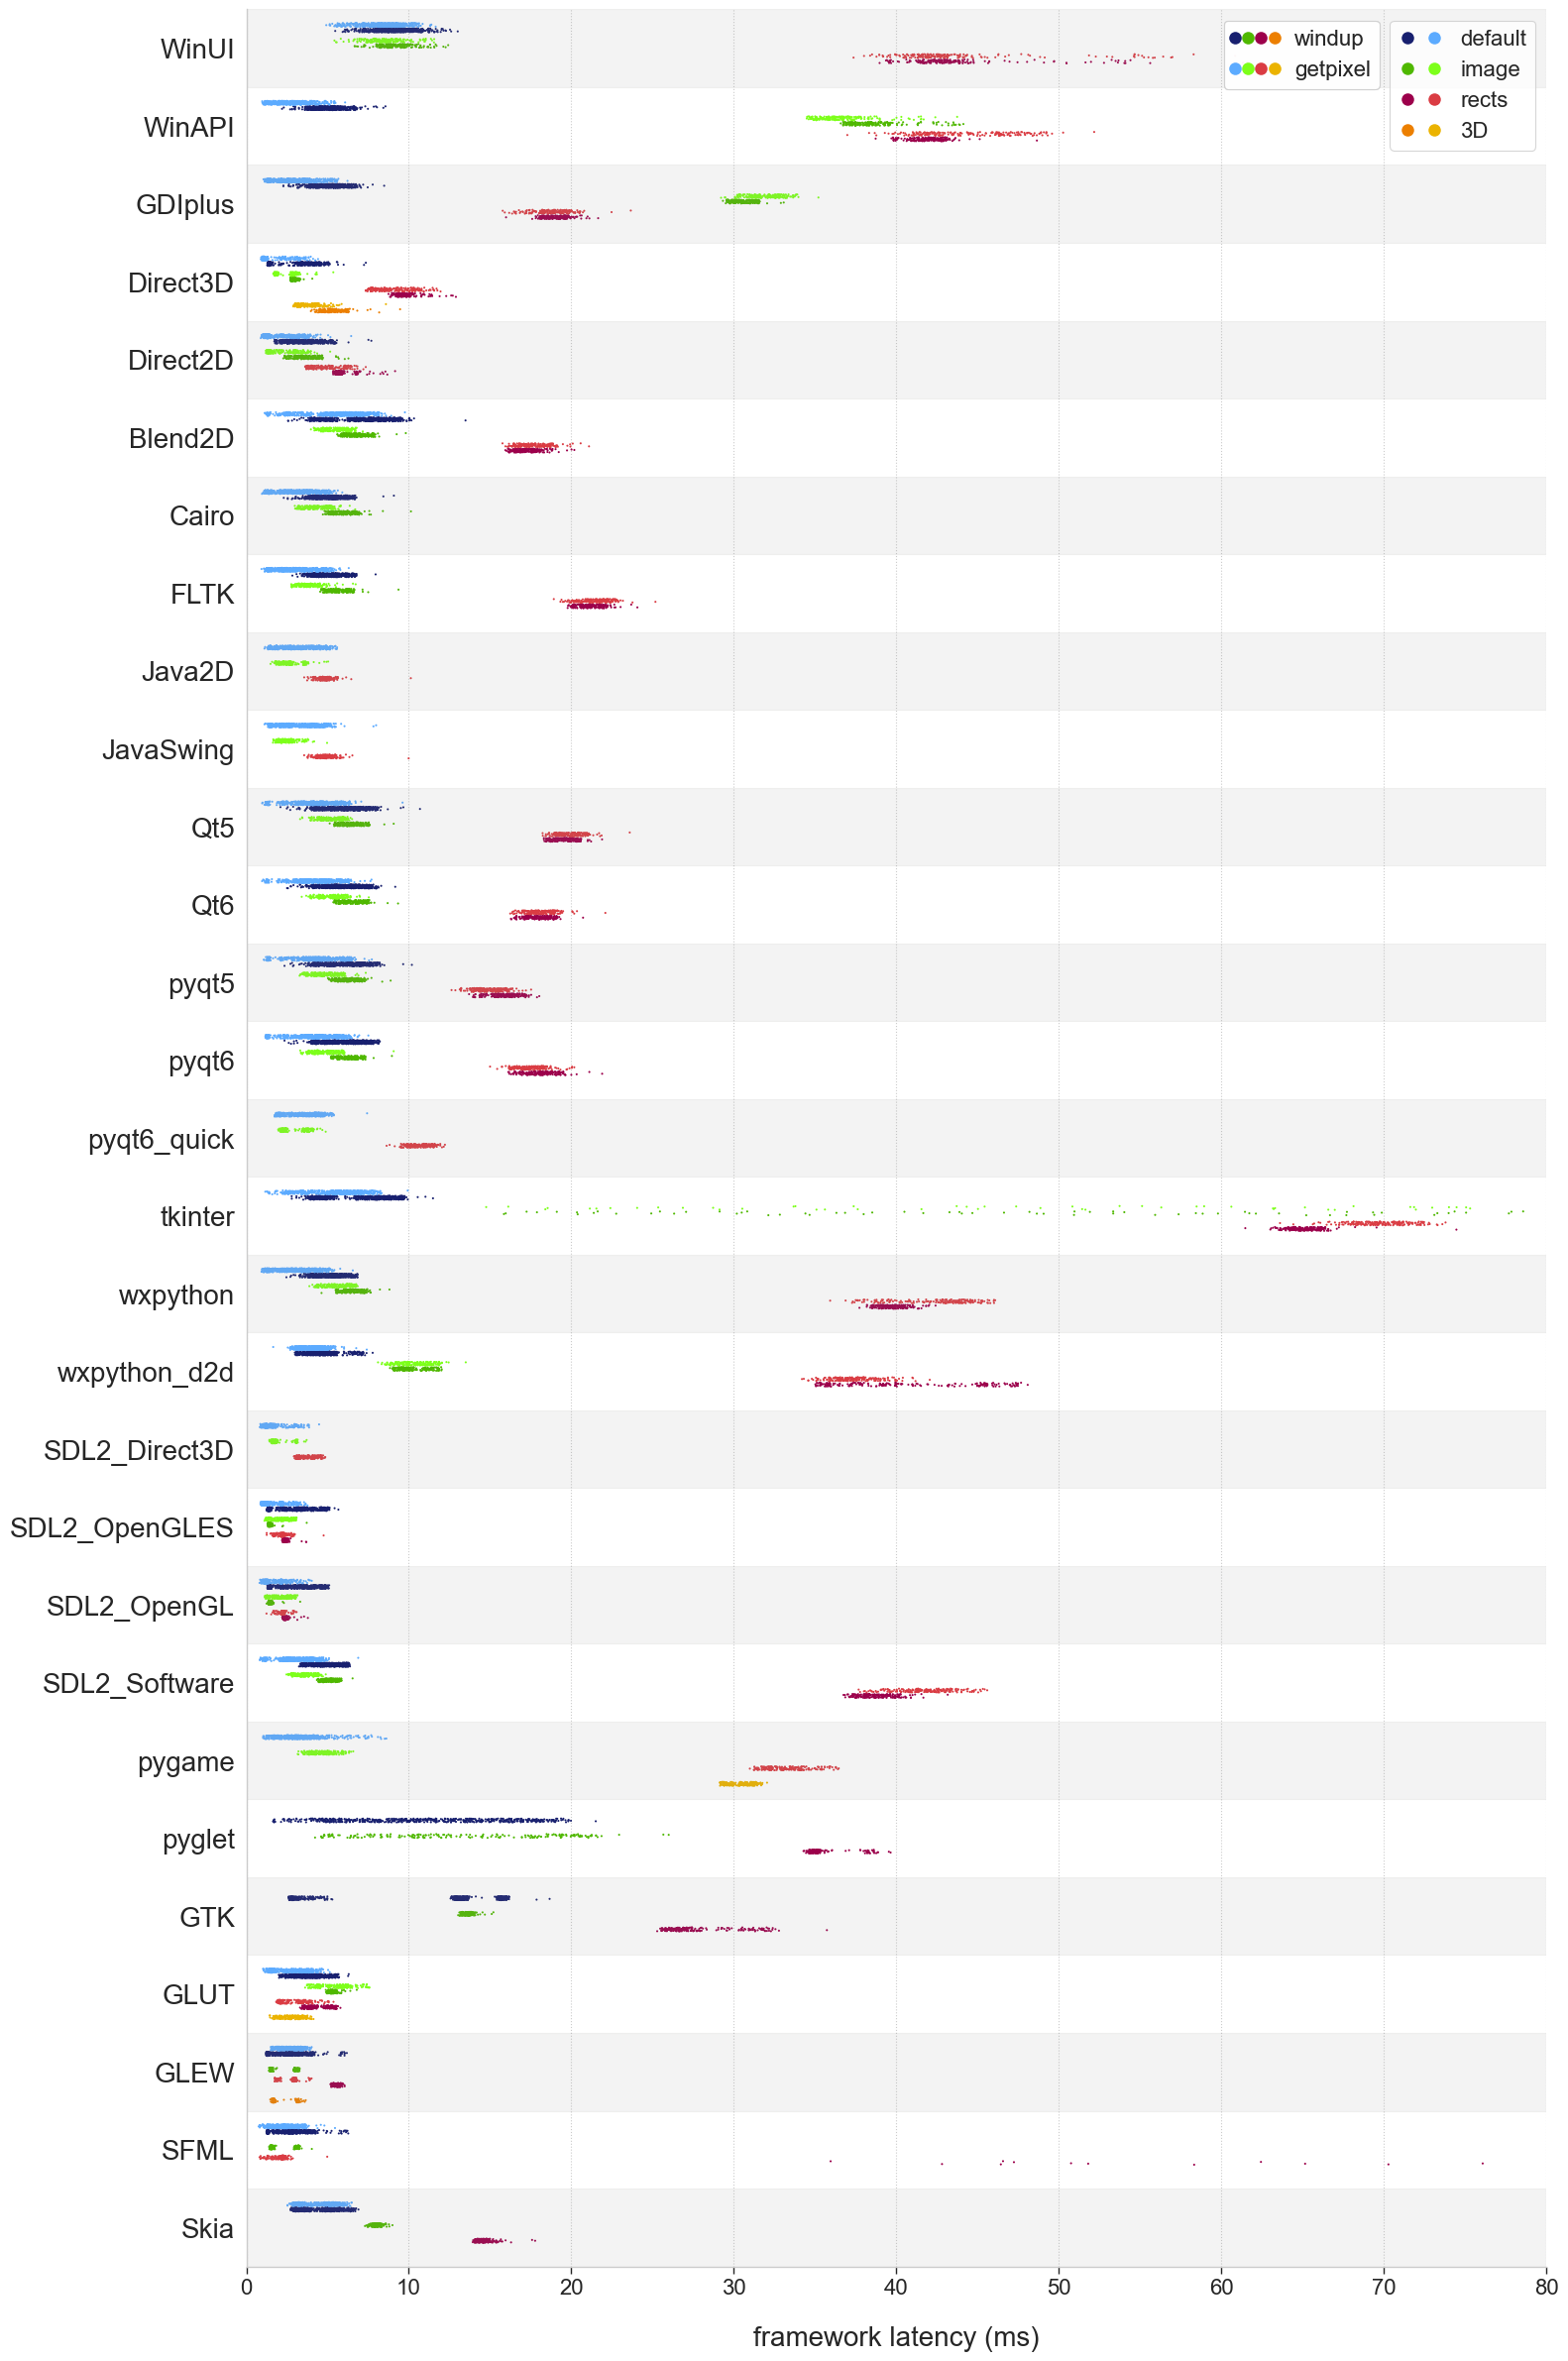

In [51]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(16, 24), "xtick.bottom": True, "grid.linestyle": ":"})

offset = lambda p: transforms.ScaledTranslation(0, p/72., plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data[data['program'] == 'windup'], y='framework', order=FRAMEWORK_ORDER, x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_DARK, size=1.5, transform=offset(0.05)+trans, zorder=1)
sns.stripplot(data=data[data['program'] == 'getpixel'], y='framework', order=FRAMEWORK_ORDER, x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_LIGHT, size=1.5, zorder=1)
# sns.pointplot(data[data['program'] == 'windup'], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=0.6, palette=PALETTE_DARK, transform=offset(0.05)+trans, join=False, estimator=np.median, errorbar='sd', markersize=3, linewidth=1.5, zorder=2)
# plot = sns.pointplot(data[data['program'] == 'getpixel'], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=0.6, palette=PALETTE_LIGHT, join=False, estimator=np.median, errorbar='sd', markersize=3, linewidth=1.5, zorder=2)

# stripped background
for i in range(len(data['framework'].unique())):
    if i % 2 == 0:
        plot.axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
plot.set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# increase label size
plot.set_xlabel('framework latency (ms)', fontsize=20)
plot.xaxis.labelpad = 20
plot.set_ylabel('')

plot.set_xlim(left=0, right=80)  # note that cairo rects, pyglet 3d, and some tkinter image are cut off
plot.tick_params(axis='y', labelsize=20)
plot.tick_params(axis='x', labelsize=16)
plt.legend(title='', fontsize=20, loc='upper right')

handles, labels = plot.get_legend_handles_labels()
print(handles)
print(labels)

handles_windup = (handles[0], handles[1], handles[2], handles[3])
handles_getpixel = (handles[4], handles[5], handles[6], handles[7])

handles_default = (handles[0], handles[4])
handles_image = (handles[1], handles[5])
handles_rects = (handles[2], handles[6])
handles_3d = (handles[3], handles[7])

condition_legend = plot.legend([handles_default, handles_image, handles_rects, handles_3d], ['default', 'image', 'rects', '3D'], markerscale=6., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)
program_legend = plot.legend([handles_windup, handles_getpixel], ['windup', 'getpixel'], markerscale=6., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)}, bbox_to_anchor=(0.88, 1), fontsize=16)

plt.gca().add_artist(condition_legend)
plt.gca().add_artist(program_legend)

plt.gca().invert_yaxis()
sns.despine(bottom = False, left = False)
plt.tight_layout()
plt.savefig("./figures/frameworks_results.pdf", format='pdf')